In [1]:
plt = plotter()
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

In [2]:
import jax
import jax.numpy as np
import optax

In [3]:
import rl_capital as rlc
import rl_capital_prime as rlp
import rl_capital_target as rlg

### Policy Grid

In [4]:
kpoly, theta = rlc.solve_iterate(R=1000)
theta

DeviceArray([3.0629098 , 0.938214  , 0.02350678], dtype=float32)

In [5]:
value = rlc.val_vec(rlc.kgrid, theta)
valuep = rlc.eval_policy_vec(rlc.kgrid, kpoly, theta)
kgrad = rlc.grad_policy_vec(rlc.kgrid, kpoly, theta)

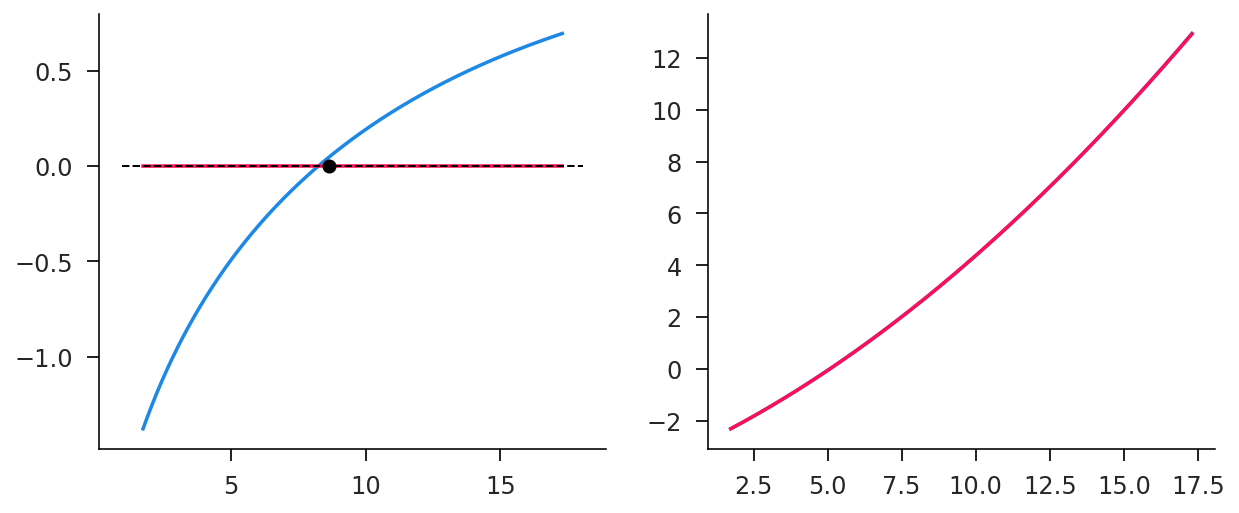

In [6]:
fig, (ax0, ax1) = plt.subplots(ncols=2, figsize=(10, 4))
ax0.plot(rlc.kgrid, kpoly-rlc.kgrid, rlc.kgrid, kgrad)
ax1.plot(rlc.kgrid, value, rlc.kgrid, valuep)
ax0.hlines(0, *ax0.get_xlim(), color='k', linestyle='--', linewidth=1)
ax0.scatter(rlc.kss, 0, color='k', zorder=10);

### Policy Projection

In [167]:
θk, θv = rlp.solve_iterate(R=10000, Δk=0.01, Δv=0.01, Mk=0.1, Mv=0.1)
θk, θv

(DeviceArray([ 8.6394711e+00,  1.0796460e+00, -2.2183564e-03], dtype=float32),
 DeviceArray([1.4734164 , 0.90811056, 0.0080702 ], dtype=float32))

In [168]:
kgrad = rlp.grad_policy_obj(θk, θv)
vgrad = rlp.grad_value_obj(θk, θv)
kgrad, vgrad

(DeviceArray([-0.01008496, -0.03462292, -0.640897  ], dtype=float32),
 DeviceArray([ 0.0036926 , -0.00071869, -0.00018285], dtype=float32))

In [169]:
kpoly = rlp.pol_vec(rlp.kgrid, θk)
value = rlp.val_vec(rlp.kgrid, θv)
valuep = rlp.eval_policy_vec(rlp.kgrid, θk, θv)

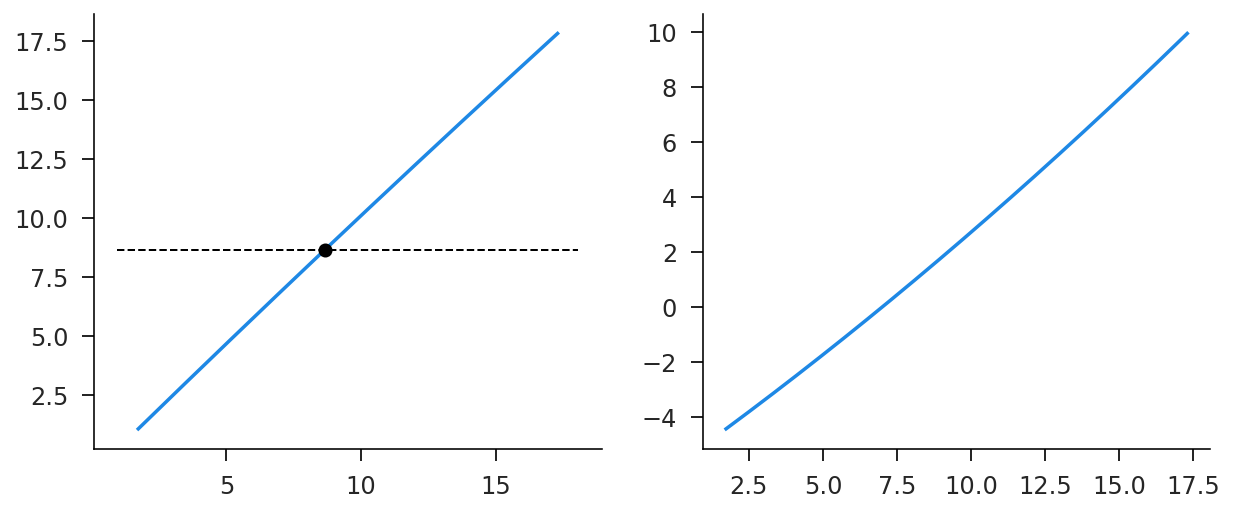

In [170]:
fig, (ax0, ax1) = plt.subplots(ncols=2, figsize=(10, 4))
ax0.plot(rlp.kgrid, kpoly)
ax1.plot(rlp.kgrid, value)
ax0.scatter(rlp.kss, rlp.kss, color='k', zorder=10)
ax0.hlines(rlp.kss, *ax0.get_xlim(), color='k', linestyle='--', linewidth=1);

### Policy Target

In [159]:
θk, θv, θkp, θvp = rlg.solve_iterate(R=10000, Δk=0.01, Δv=0.01, Mk=0.1, Mv=0.1, τ=1.0)
θk, θv

(DeviceArray([-8.999997, -9.856247, -9.990407], dtype=float32),
 DeviceArray([11.000825, 10.081374, 10.010415], dtype=float32))

In [160]:
kgrad = rlg.grad_policy_obj(θk, θv)
vgrad = rlg.grad_value_obj(θk, θv, θk, θv)
kgrad, vgrad

(DeviceArray([  -4478.5034,  -14329.105 , -174471.64  ], dtype=float32),
 DeviceArray([ 1960637.1, 10002564. , 96698016. ], dtype=float32))

In [161]:
kpoly = rlg.pol_vec(rlp.kgrid, θk)
value = rlg.val_vec(rlp.kgrid, θv)
valuep = rlg.eval_policy_vec(rlp.kgrid, θkp, θvp)

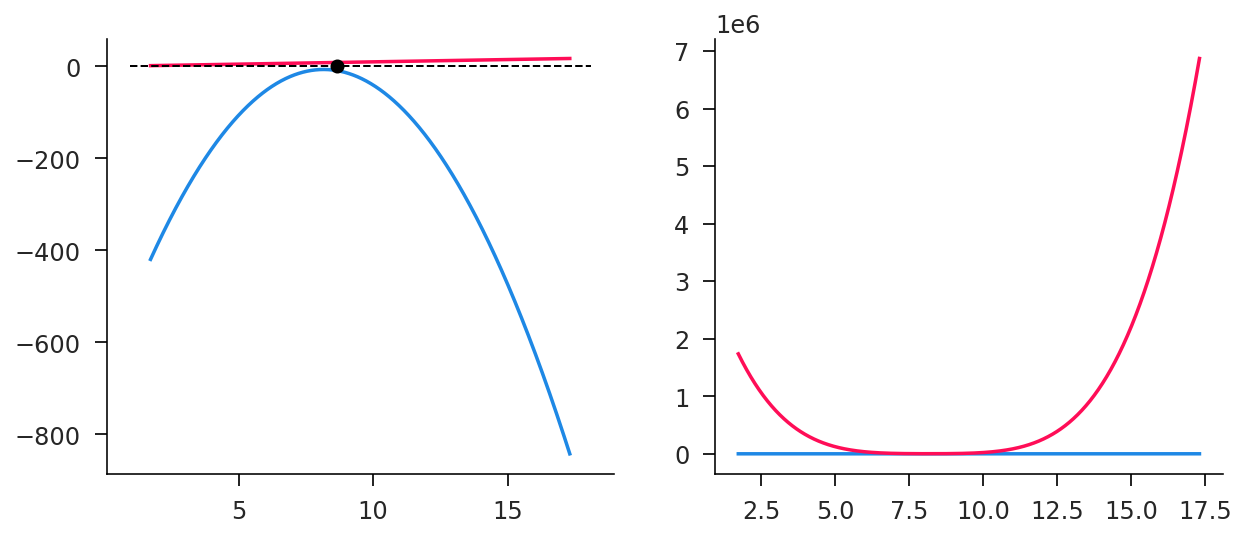

In [162]:
fig, (ax0, ax1) = plt.subplots(ncols=2, figsize=(10, 4))
ax0.plot(rlc.kgrid, kpoly, rlc.kgrid, rlc.kgrid)
ax1.plot(rlc.kgrid, value, rlc.kgrid, valuep)
ax0.hlines(0, *ax0.get_xlim(), color='k', linestyle='--', linewidth=1)
ax0.scatter(rlc.kss, 0, color='k', zorder=10);